In [1]:

import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

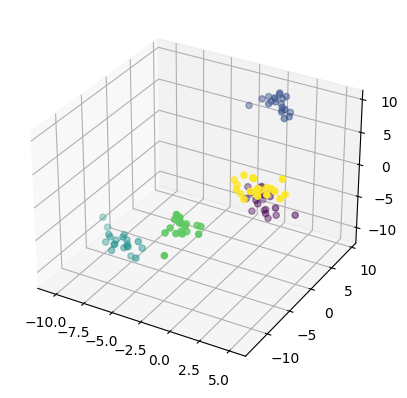

[ 0.73934402 -2.94305779  3.32040301] 4
[-0.88786636  4.43021877 -3.06475873] 0
[-6.01597427 -7.43226473 -9.48407529] 2
[1.57151847 5.99674141 7.7520466 ] 1
[ -2.24839026 -10.15395163  -1.71051876] 3
[-7.46261631 -5.83212057 -9.06325014] 2
[ 4.92959008 -3.43552807  5.86247589] 4
[ 1.90420886  3.66467553 -5.64745905] 0
[ 0.28352654  4.07132556 -3.39922132] 0
[-0.80346563  3.91807101 -4.56881622] 0


In [2]:
X, Y = datasets.make_blobs(n_samples=100, n_features=3, centers=5, cluster_std=1.05, random_state=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

for x, y in list(zip(X, Y))[:10]:
    print(x, y)

In [3]:
#set parameters
np.random.seed = 30 # Allows us to get the results each time
W = np.random.rand(3,5) # we have 3 different features in X and we have 5 different classes
B = np.random.rand(5) # we have 5 classes
print(W,B)
learning_rate = 0.1
num_epochs = 50

[[0.22231574 0.87403411 0.50063046 0.2536201  0.88353642]
 [0.63466558 0.31316693 0.65084149 0.21033471 0.62740616]
 [0.63139238 0.78455675 0.62310764 0.91467868 0.77099209]] [0.67147175 0.91553479 0.48353135 0.62870885 0.28605465]


In [4]:
def one_hot(y):
    # Create a matrix with a row per data point and a column per class
    #Fill with zeros and then indicate the class of each data point w a 1 in the matrix (based on values of y)
    classes = list(set(y)) # creates lists of unique values in y 
    onehot = np.zeros((len(y), len(classes))) # creates matrix of 100X5
    for i,v in enumerate(y): # iterate through y and update onehot's column to 1 based class
        onehot[i][v] = 1
    return onehot

In [5]:
def softmax(z):
    expz = np.exp(z)# 100 X 5 (take each number in the matrix and and make it e^that_number)

    sumexpz = np.sum(expz, axis = 1) # 100X1 (the sum of all the values in each column)

    sigma = np.transpose(expz) /sumexpz # 100X5 / 100X1 = 5X100 we want the number of columns in the first matrix to 
    #be equal to the number of rows in the second matrix 
    # divide by sumexpz in order to normalize the outputs (squish it)
    

    return np.transpose(sigma) # transpose to get 100 X 5



In [6]:
def predict(X,W,B):
    # multiply the matrix of data (100X3) of features by the weights, and add the bias
    # W is 3X5 for 3 features and the 5 weights 
    # B is 1X5 (one for each class)
    z = np.matmul(X,W) +B 
    #shape of z is 
    # multiplying one matrix by another is taking the rows of one and the columns of the other
    # z = (100X5) (100 data points are important and 5 class are most important (5 (1d matrix)
    #  will be added to each row because of numpy))

    #Creating the probability distribution (normalizes the values to 
    # weights) and will not add up to anything, more confidence = higher, so it takes 
    # the arbitrary numbers but keep their order 
    y_hat = softmax(z)
    return y_hat


In [7]:

def cost_function(y_hat, Y_ohe):
    m = len(Y_ohe) # Number of training examples 
    y_log_y_hat = np.multiply(np.log(y_hat), Y_ohe) #Throws out the values from y_hat
    # ^that was a zero prediction, shape of y_hat 100X 5 for both so the output is 100X5
    # outputs negative numbers in only the predicted classes 
    # a matrix that contains the log of the predictions only for classes of interest
    
    loss = -np.sum(y_log_y_hat)/m #
    return loss

In [8]:
def part_der_w(X, diff):
    return np.transpose(np.matmul(np.transpose(diff), X))

def part_der_b(diff):
    return np.sum(diff, axis=0)

In [9]:
def update_hyperparameter(W,B,learning_rate, X, Y_ohe):
    m = len(X)
    y_hat = predict(X,W,B)
    

    cost = cost_function(y_hat, Y_ohe)
    diff = y_hat - Y_ohe

    partial_der_w = partial_der_w(X, diff)
    partial_der_b = partial_der_b(diff)

    W -= learning_rate*partial_der_w/m
    B -= learning_rate*partial_der_b/m

    return W, B, cost, y_hat

In [10]:
def accuracy_metric(Y, y_hat):
    m = len(Y)
    correct = 0
    for y_true, y_pred in zip(Y, y_hat):
        y_pred = np.argmax(y_pred, axis=1)
        if y_pred == y_true:
            correct+=1
        
    return correct*100/m 

In [ ]:
cost_per_epoch = []
acc_per_epoch = []

for epoch in range(num_epochs):
    print(f'------this is epoch {epoch + 1}-------------')
    print(f'--- old weights: {W}')
    print(f'--- old bias: {B}')


    Y_ohe = one_hot(Y)
    W,B,cost, y_pred = update_hyperparameter(W,B,learning_rate,X,Y_ohe)
    acc = accuracy_metric(Y,y_pred)
    acc_per_epoch.append(acc)
    cost_per_epoch.append(cost)


    print(f'-- New bias: {B}')
    print(f'-- Accuracy: {acc}')
    print('\n')




In [11]:
plt.show(cost_per_epoch)
plt.show()

NameError: name 'cost_per_epoch' is not defined